In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [195]:
df = pd.read_csv("data/ks-projects-201801.csv")
df["launched"] = pd.to_datetime(df["launched"])
df = df.set_index("launched") 
df.head()

,ID,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
launched,,,,,,,,,,,,,,
2015-08-11 12:12:28,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95
2017-09-02 04:43:57,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00
2013-01-12 00:20:50,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.0,failed,3,US,220.0,220.0,45000.00
2012-03-17 03:24:11,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.0,failed,1,US,1.0,1.0,5000.00
2015-07-04 08:35:03,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Kickstarter Results Count
There are 378,661 kickstarters in the data. From the graph, we can see that nearly 200,000 of them have failed. So this means that slightly more than half of the Kickstarters have failed. 

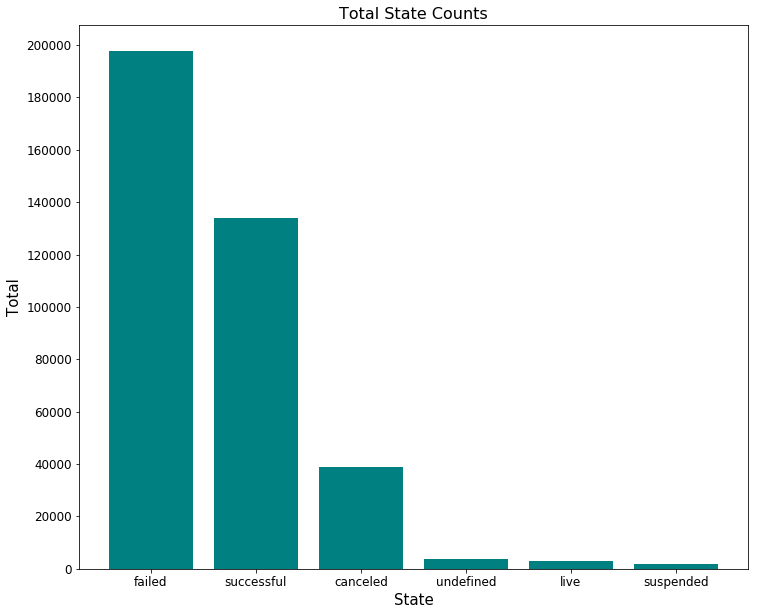

In [3]:
state_count = df.state.value_counts()

plt.figure(figsize=(12,10))

plt.bar(state_count.index, state_count, color="teal")

plt.title("Total State Counts", fontsize=16)
plt.xlabel("State", fontsize=15)
plt.ylabel("Total", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.yticks(np.arange(0,210000,20000))

plt.show()

### Results by Main Categories
One thing interesting is that the most successful main category was dance, because it is not something that is one the least popular Main Category on Kickstarter. 

Another interesting thing is that the least successful main category was technology. Tecnology is a category that seems like people would want to support, because people usually like seeing technology advancing. 

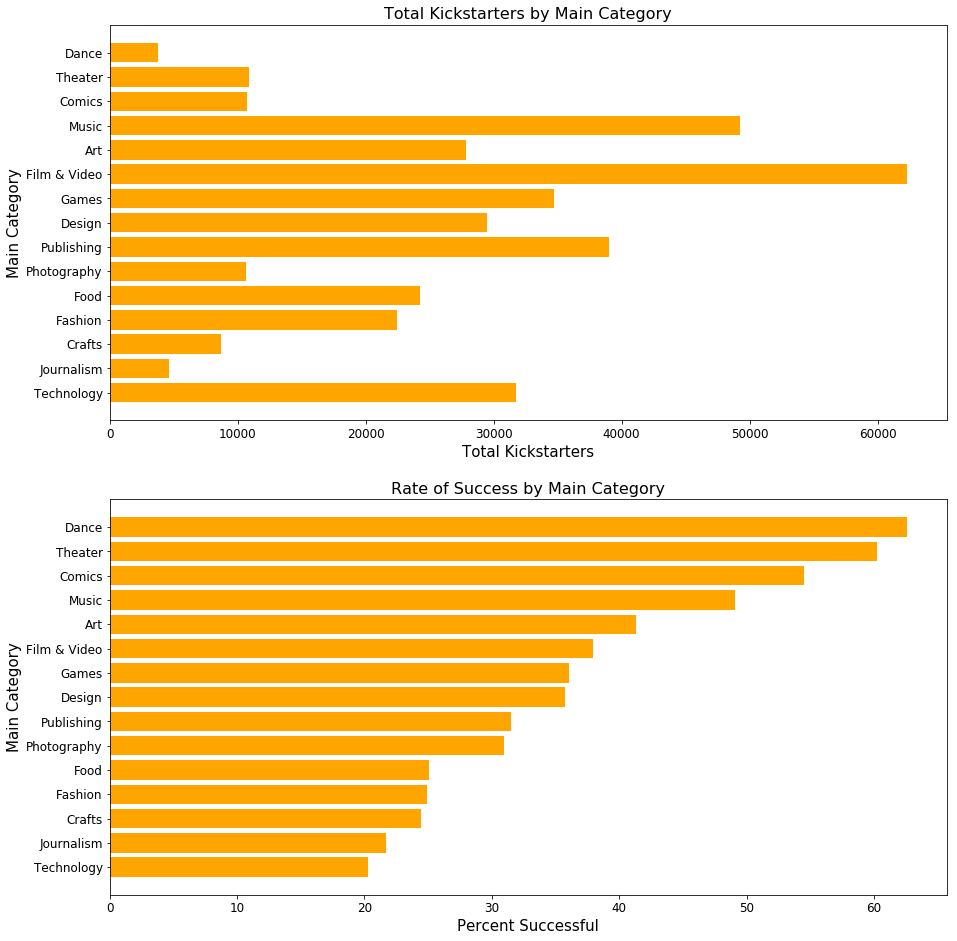

In [4]:
df_with_results = df[ (df["state"] == "successful") | (df["state"] == "failed") | (df["state"] == "canceled")]
total = df_with_results["main_category"].value_counts().sort_index()

result_rate = 100 * df_with_results[df_with_results["state"] == "successful"]["main_category"].value_counts().sort_index()/total
result_rate = result_rate.sort_values()


plt.figure(figsize=(15,16))

plt.subplot(2,1,1)

total = total.reindex(result_rate.index)

plt.barh(total.index, total, color="orange")

plt.title("Total Kickstarters by Main Category", fontsize=16)
plt.ylabel("Main Category", fontsize=15)
plt.xlabel("Total Kickstarters", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,1,2)

plt.barh(result_rate.index, result_rate, color="orange")

plt.title("Rate of Success by Main Category", fontsize=16)
plt.ylabel("Main Category", fontsize=15)
plt.xlabel("Percent Successful", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Top and Least Successful Categories

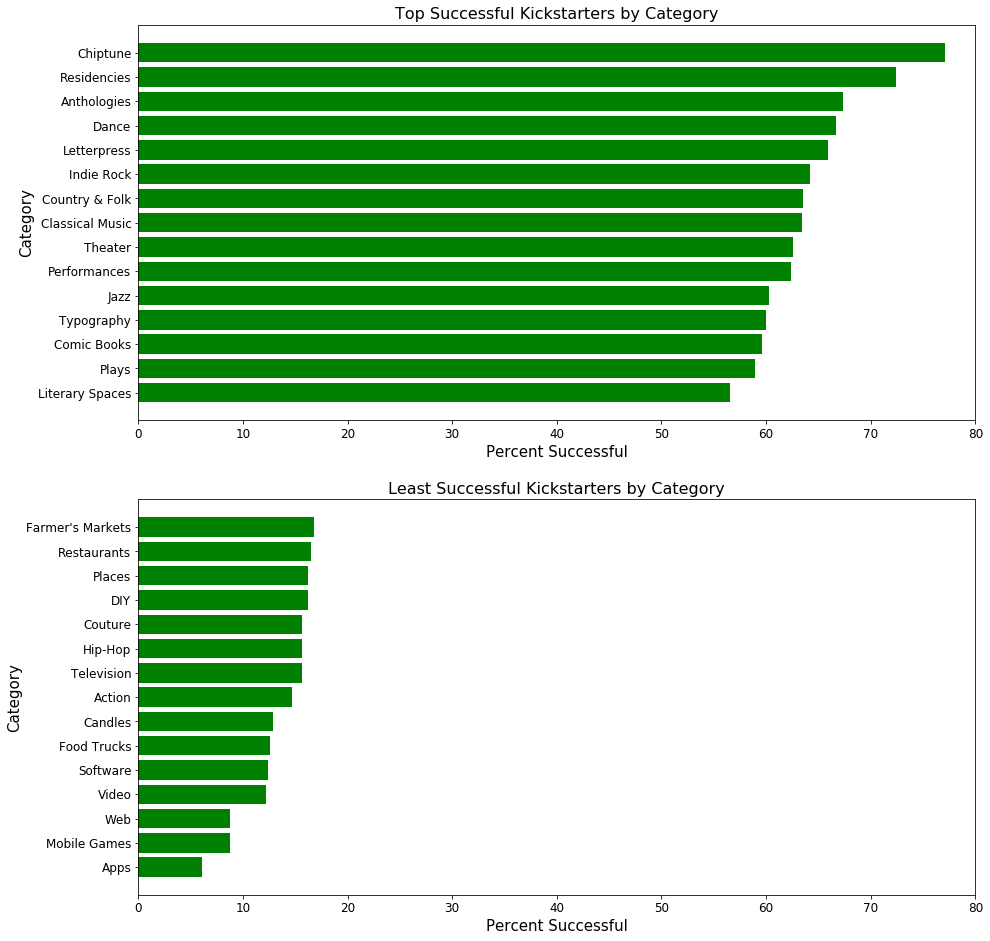

In [92]:
df_with_results = df[ (df["state"] == "successful") | (df["state"] == "failed") | (df["state"] == "canceled")]
total = df_with_results["category"].value_counts().sort_index()

success_rate = 100 * df_with_results[df_with_results["state"] == "successful"]["category"].\
                    value_counts().sort_index()/total

success_rate = success_rate.sort_values()

top_success = success_rate[-15:]
least_success = success_rate[:15]

plt.figure(figsize=(15,16))

plt.subplot(2,1,1)

plt.barh(top_success.index, top_success, color="green")

plt.title("Top Successful Kickstarters by Category", fontsize=16)
plt.ylabel("Category", fontsize=15)
plt.xlabel("Percent Successful", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,80])

plt.subplot(2,1,2)

plt.barh(least_success.index, least_success, color="green")

plt.title("Least Successful Kickstarters by Category", fontsize=16)
plt.ylabel("Category", fontsize=15)
plt.xlabel("Percent Successful", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,80])

plt.show()

### Median Goal and Pledge by Main Category
This is the median goal and pledge for each main category. From the graph, we can see that the highest goal is from technology. This could explain why it has such a low success rate. The median pledge for technology is also very low.

Another thing we can see from the graph is that in every main category, the median pledge is lower than the median goal.

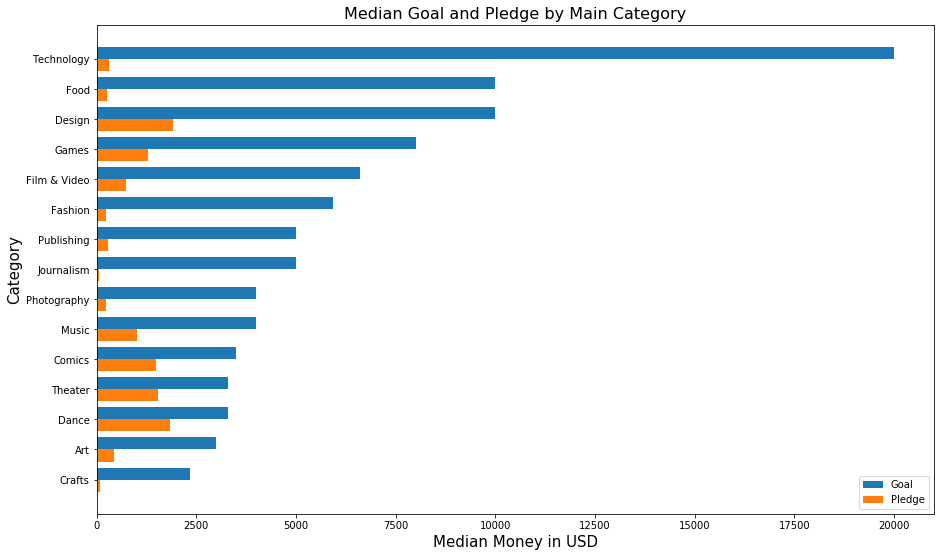

In [91]:
median_goal = df.groupby("main_category")["usd_goal_real"].median()
median_pledge = df.groupby("main_category")["usd_pledged_real"].median()

median_goal = median_goal.sort_values()
median_pledge = median_pledge.reindex(median_goal.index)

plt.figure(figsize=(15,9))

height = .4
bar_index = np.arange(len(median_goal))

plt.barh(bar_index, median_goal, height=height, label="Goal")
plt.barh(bar_index - height, median_pledge, height=height, label="Pledge")

plt.yticks(np.arange(15) - height/2, median_goal.index)

plt.title("Median Goal and Pledge by Main Category", fontsize=16)
plt.ylabel("Category", fontsize=15)
plt.xlabel("Median Money in USD", fontsize=15)


plt.legend()

plt.show()

### Success Rate by Goal
When looking at the total number of Kickstarters at each goal range, we can see that over 200,000 of them have a goal of under 10,000 dollars. Also, as the goal ranges get larger, the number of Kickstarters usually increase. The exceptions are at 50000-59999 and 100000+, where there is an increase from the previous range.

Looking at the success rate for each price range, it is clear that higher price ranges have a lower success rate.

In [137]:
price_index = ["0-9999", "10000-19999", "20000-29999", "30000-39999", "40000-49999", "50000-59999",  "60000-69999", \
                   "70000-79999",  "80000-89999",  "90000-99999", "100000+"]

def goal_range(goal):
    
    if goal < 10000:
        return "0-9999"
    elif goal < 20000:
        return "10000-19999"
    elif goal < 30000:
        return "20000-29999"
    elif goal < 40000:
        return "30000-39999"
    elif goal < 50000:
        return "40000-49999"
    elif goal < 60000:
        return "50000-59999"
    elif goal < 70000:
        return "60000-69999"
    elif goal < 80000:
        return "70000-79999"
    elif goal < 90000:
        return "80000-89999"
    elif goal < 100000:
        return "90000-99999"
    
    return "100000+"

In [176]:
df_with_results = df[ (df["state"] == "successful") | (df["state"] == "failed") | (df["state"] == "canceled")]
df_with_results.loc[:,"goal_range"] = df_with_results.loc[:, "usd_goal_real"].map(goal_range)

total = df_with_results.loc[:,"goal_range"].value_counts().reindex(price_index)

success_rate = 100 * df_with_results[df_with_results["state"] == "successful"].groupby("goal_range").size()\
                                                            .reindex(total.index)/total
success_rate = success_rate.reindex(price_index)



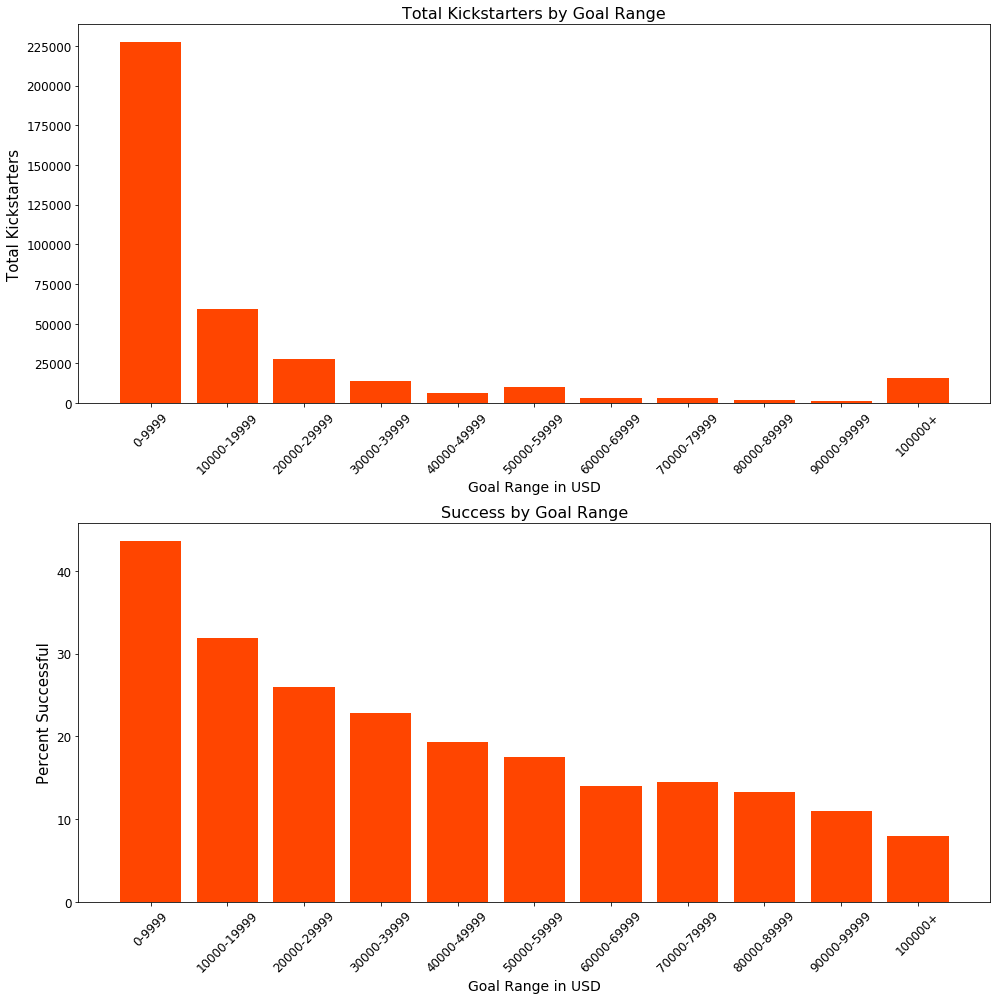

In [187]:
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)

plt.bar(total.index, total, color="orangered")

plt.title("Total Kickstarters by Goal Range", fontsize=16)
plt.ylabel("Total Kickstarters", fontsize=15)
plt.xlabel("Goal Range in USD", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, 250000, 25000), fontsize=12)

plt.subplot(2,1,2)

plt.bar(success_rate.index, success_rate, color="orangered")

plt.title("Success by Goal Range", fontsize=16)
plt.ylabel("Percent Successful", fontsize=15)
plt.xlabel("Goal Range in USD", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

### Total KickStaters per Month
From 2009 to early 2015, there was an overall increase in the number of Kickstarters per month, but afterwords the has been a small decline in the number of Kickstarters.


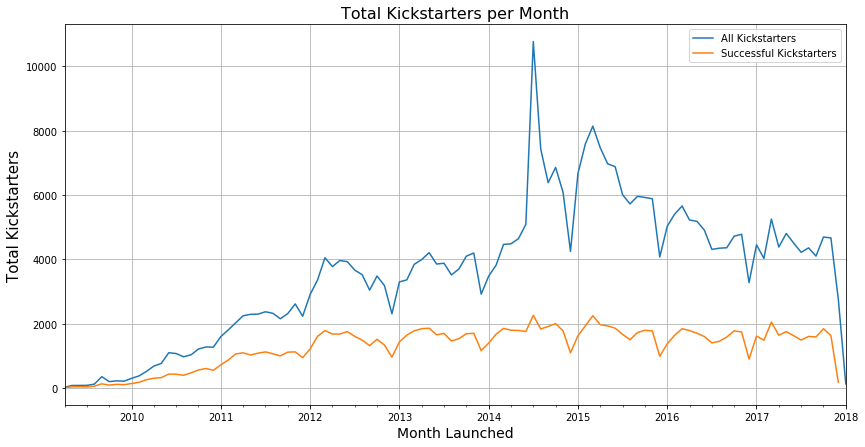

In [269]:
monthly_kickstarters = df[df.index.year >= 2009].resample('M').size()
monthly_kickstarters_successful = df[(df.index.year >= 2009) & (df["state"] == "successful")].resample('M').size()

plt.figure(figsize=(14,7))

monthly_kickstarters.plot(label="All Kickstarters")
monthly_kickstarters_successful.plot(label="Successful Kickstarters")


plt.title("Total Kickstarters per Month", fontsize=16)
plt.ylabel("Total Kickstarters", fontsize=15)
plt.xlabel("Month Launched", fontsize=14)

plt.grid()
plt.legend()

plt.show()

### Success Rate by Country
The first graph shows us that the majority of the Kickstarters are from the United States. The United States also has the secound highest success rate amoung the all of the countries.

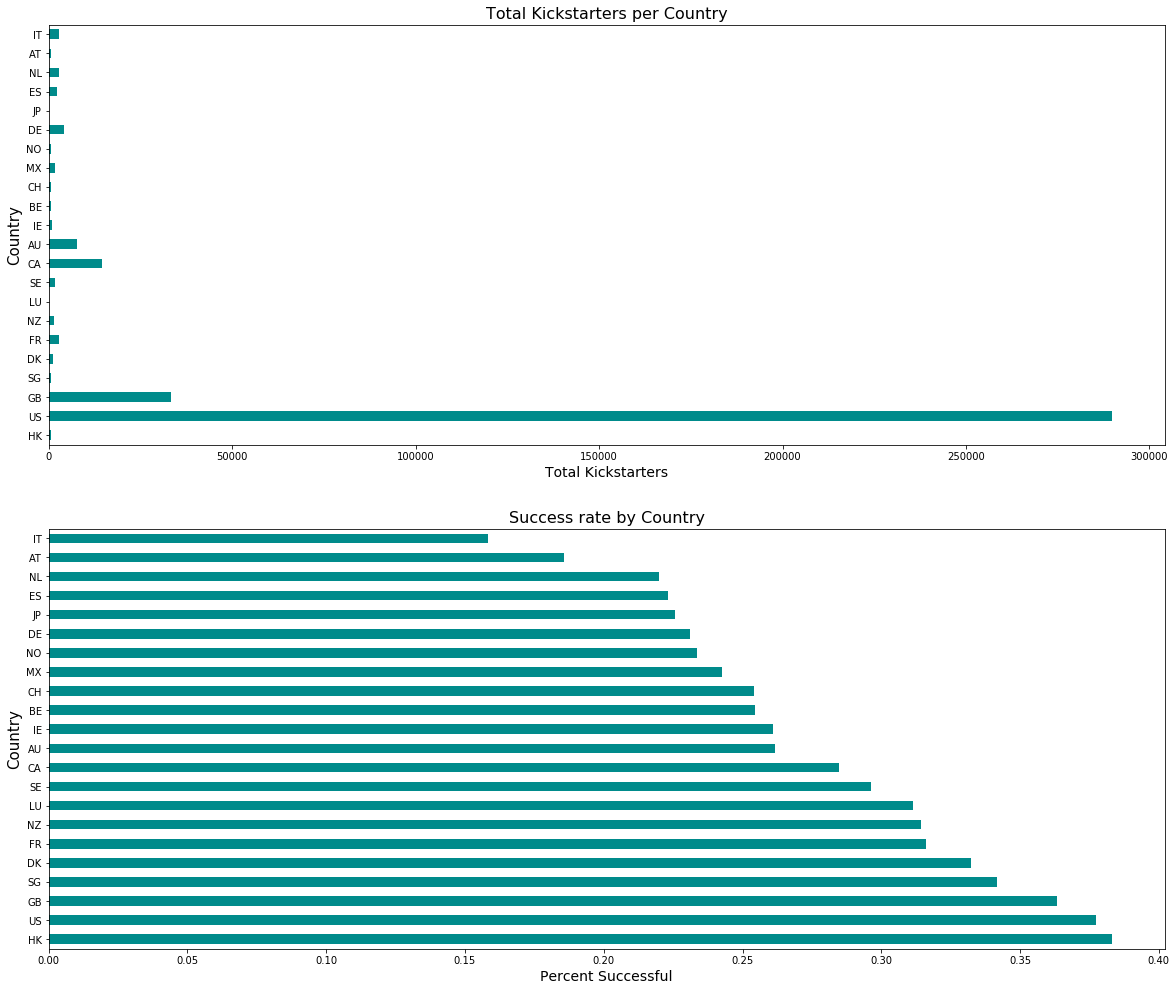

In [267]:
df_with_results = df[ (df["state"] == "successful") | (df["state"] == "failed") | (df["state"] == "canceled")]

total_countries = df_with_results["country"].value_counts()

top_countries = (df_with_results[df_with_results["state"] == "successful"]["country"].value_counts().\
                     reindex(total_countries.index)/total_countries).sort_values(ascending = False)

total_countries.drop('N,0"', inplace=True)
top_countries.drop('N,0"', inplace=True)
total_countries = total_countries.reindex(top_countries.index)

plt.figure(figsize=(20,17))

plt.subplot(2,1,1)
total_countries.plot.barh(color="darkcyan")

plt.title("Total Kickstarters per Country", fontsize=16)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Total Kickstarters", fontsize=14)

plt.subplot(2,1,2)
top_countries.plot.barh(color="darkcyan")

plt.title("Success rate by Country", fontsize=16)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Percent Successful", fontsize=14)

plt.show()